In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pi = math.pi

In [3]:
m = 1000 # kgs
k = 20000 # (N/m)
xi = 0.05 # damping constant
P = 750 # N, force applied to structure
f = 1 # Hz, the frequecy of the applied force
pi = math.pi 

# Properties of structures.
omega_n = math.sqrt(k/m)
f_n = 2*pi*omega_n
omega_d = omega_n*math.sqrt(1-xi**2)
omega = 2*pi*f
beta = omega/omega_n
tmax = 100

In [4]:
# A Funciton for writing time interval

def generateVectors(timestep):
    
    nPoints = tmax/timestep
    
    timeVector  = np.linspace(0,tmax,num=int(nPoints))
    forceVector = P*np.sin(omega*timeVector)
    
    return timeVector,forceVector

In [43]:
# Now using the generateVector function to get time and force Vectors at 0.2,0.1,0.05,0.01 timestep.
t1,f1 = generateVectors(0.2)
t2,f2 = generateVectors(0.1)
t3,f3 = generateVectors(0.05)
t4,f4 = generateVectors(0.01)
t5,f5 = generateVectors(0.005)

In [44]:
# Define function to calculate the response
def calculateResponse(tVector, fVector, timeStep):  
    delta_t = timeStep
    nPoints = len(tVector)
    #Constants
    A = math.e**(-xi*omega_n*delta_t)*((xi/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t)+np.cos(omega_d*delta_t))
    B = math.e**(-xi*omega_n*delta_t)*((1/omega_d*np.sin(omega_d*delta_t)))
    C = (1/k)*(((2*xi)/(omega_n*delta_t)) + math.e**(-xi*omega_n*delta_t)*((((1-2*(xi**2))/(omega_d*delta_t))-(xi/(math.sqrt(1-(xi**2)))))*math.sin(omega_d*delta_t)-(1+((2*xi)/(omega_n*delta_t)))*np.cos(omega_d*delta_t)))
    D = (1/k)*(1-((2*xi)/(omega_n*delta_t))+math.e**(-xi*omega_n*delta_t)*(((2*(xi**2)-1)/(omega_d*delta_t))*np.sin(omega_d*delta_t)+((2*xi)/(omega_n*delta_t))*np.cos(omega_d*delta_t)))

    A1 = -math.e**(-xi*omega_n*delta_t)*((omega_n/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t))
    B1 = math.e**(-xi*omega_n*delta_t)*(np.cos(omega_d*delta_t)-((xi)/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t))
    C1 =(1/k)*(-(1/delta_t)+math.e**(-xi*omega_n*delta_t)*((((omega_n)/(math.sqrt(1-(xi**2))))+((xi)/(delta_t*math.sqrt(1-(xi**2)))))*np.sin(omega_d*delta_t)+(1/delta_t)*np.cos(omega_d*delta_t)))
    D1 =(1/k)*((1/delta_t)-(math.e**(-xi*omega_n*delta_t)/delta_t)*((xi/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t)+np.cos(omega_d*delta_t))) 

    #INITIAL CONDITIONS
    x0=0 
    v0=0

    pos = [] #Initialise array to hold position
    vel = [] #Initialise array to hold velocity
    
    #MAIN LOOP
    for n, timestep in enumerate(tVector):
        timestep = round(timestep,3) #The current time

        #Calculate the force slope
        if n<nPoints-1:
            Fn = fVector[n]
            Fnp1 = fVector[n+1]
        else:
            Fn = fVector[n]
            Fnp1 = 0

        curPos = (A*x0) + (B*v0) + (C*Fn) + (D*Fnp1)
        curVel = (A1*x0) + (B1*v0)+ (C1*Fn) + (D1*Fnp1)

        pos.append(curPos)
        vel.append(curVel)

        x0 = curPos;
        v0 = curVel;
    
    return pos

In [45]:
pos1 = calculateResponse(t1,f1,0.2)
pos2 = calculateResponse(t2,f2,0.1)
pos3 = calculateResponse(t3,f3,0.05)
pos4 = calculateResponse(t4,f4,0.01)
pos5 = calculateResponse(t5,f5,0.005)

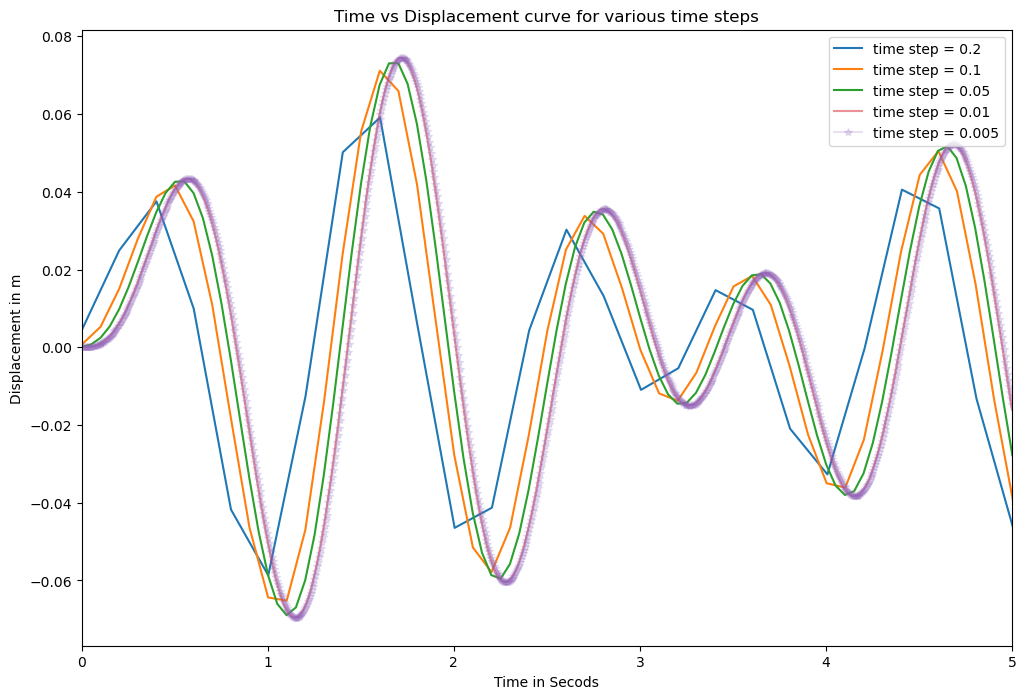

In [52]:
fig = plt.figure(figsize=(12,8))
plt.title('Time vs Displacement curve for various time steps')
plt.xlabel('Time in Secods')
plt.ylabel('Displacement in m')
plt.xlim([0,5])
plt.plot(t1,pos1,label = 'time step = 0.2')
plt.plot(t2,pos2,label = 'time step = 0.1')
plt.plot(t3,pos3,label = 'time step = 0.05')
plt.plot(t4,pos4,label = 'time step = 0.01',alpha = 0.5)
plt.plot(t5,pos5,'*-',label = 'time step = 0.005',alpha=0.2)
plt.legend(loc = 1)

plt.show()